# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Define kernels

In [7]:
def linK(a, b):
    return a * b

def rbfK(a, b):
    return math.exp(-0.5 * ((a-b)**2))

def polyK(a, b):
    return (1 + a*b)**3

# Define multivariate Gaussian functions

In [8]:
def createKXX(data, k, noise=0):
    kxx = [[k(a, b) + noise * (i == j) for i, a in enumerate(data)] for j, b in enumerate(data)]
    return np.matrix(kxx)

def createKXTX(xtest, data, k):
    kxtx = [k(xtest, b) for b in data]
    return np.array(kxtx)
    
def createKXXT(xtest, data, k):
    kxxt = [k(a, xtest) for a in data]
    return np.array(kxxt)

def createKXTXT(xtest, k, noise=0):
    return k(xtest, xtest) + noise

def calc_mu(kxtx, kxxi, ydata):
    mu = kxtx.dot(kxxi).dot(ydata.T)
    return mu[0, 0]

def calc_sig(kxtxt, kxtx, kxxi, kxxt):
    sig = kxtxt - kxtx.dot(kxxi).dot(kxxt.T)
    return sig[0, 0]

def predict_mu(x, xdata, ydata, kxxi, k):
    kxxt = createKXXT(x, xdata, k)
    kxtx = createKXTX(x, xdata, k)
    return calc_mu(kxtx, kxxi, ydata)

def predict_sig(x, xdata, ydata, kxxi, k, noise=0):
    kxtxt = createKXTXT(x, k, noise=noise)
    kxtx = createKXTX(x, xdata, k)
    kxxt = createKXXT(x, xdata, k)
    return calc_sig(kxtxt, kxtx, kxxi, kxxt)

# Perform regression

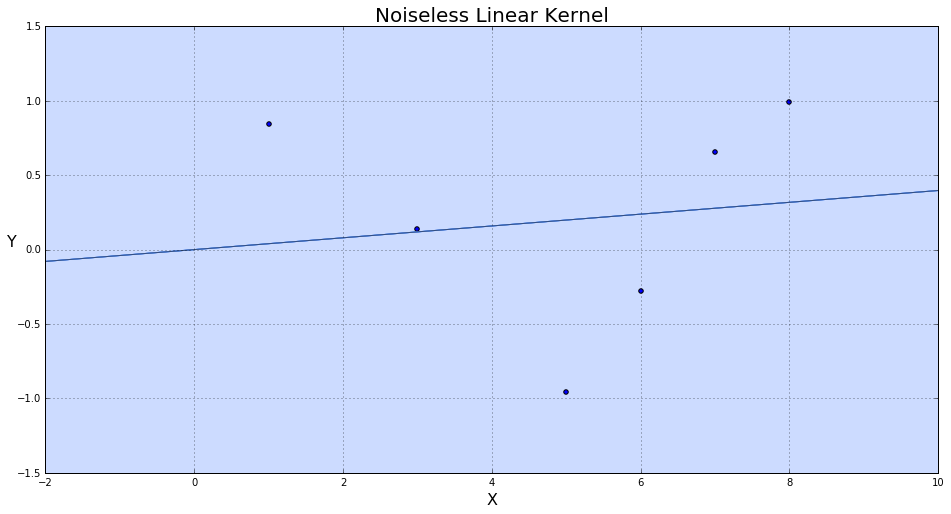

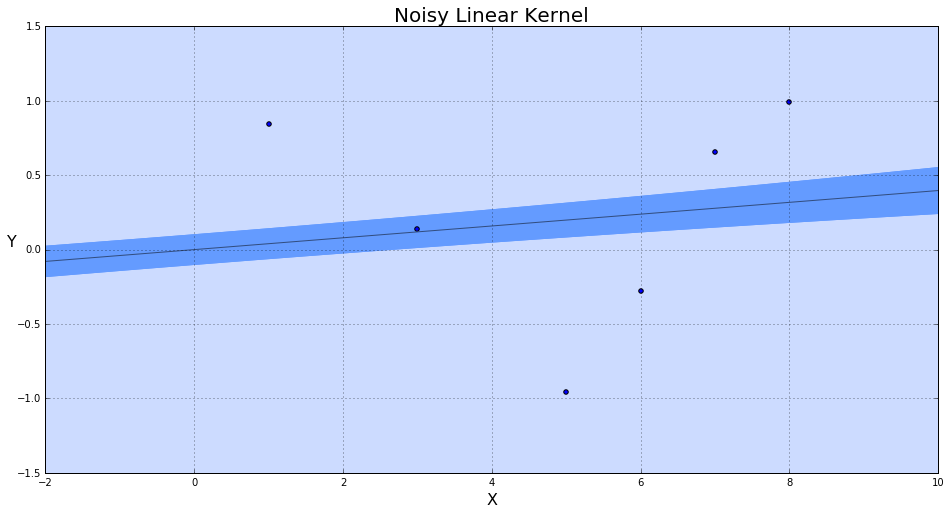

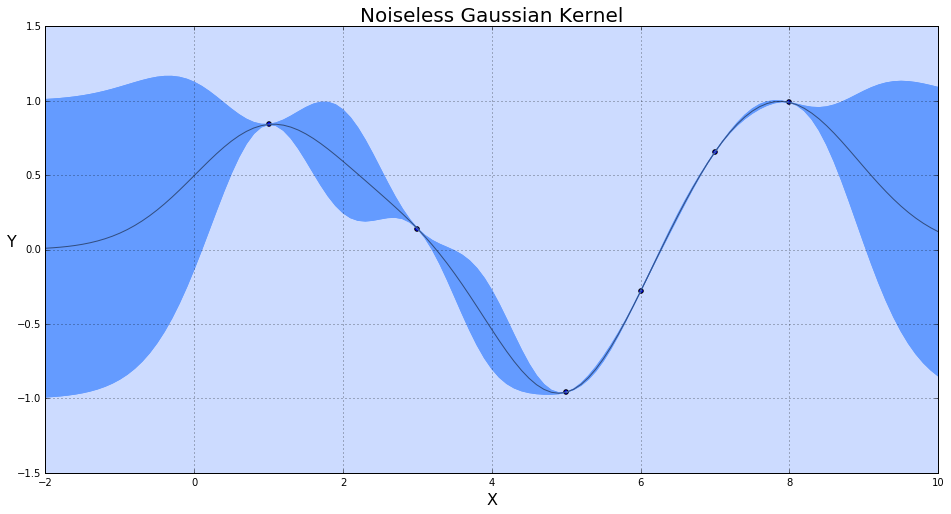

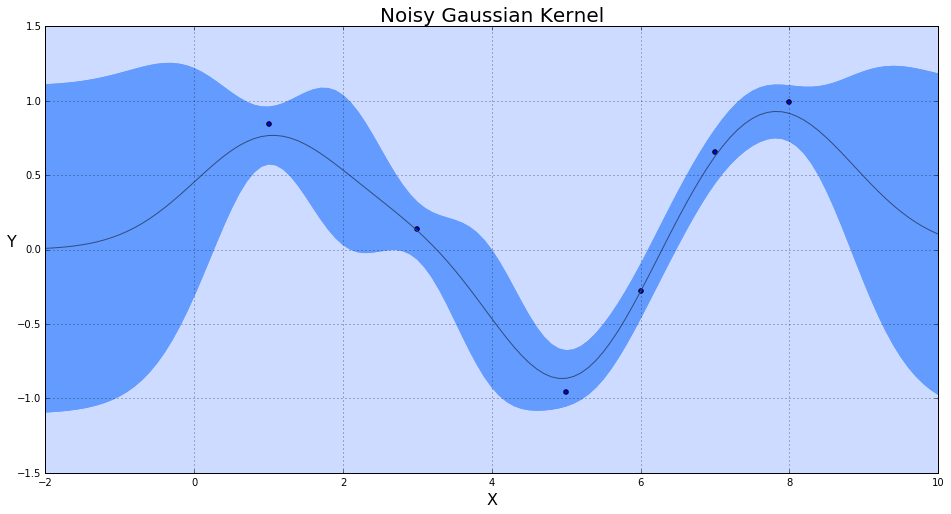

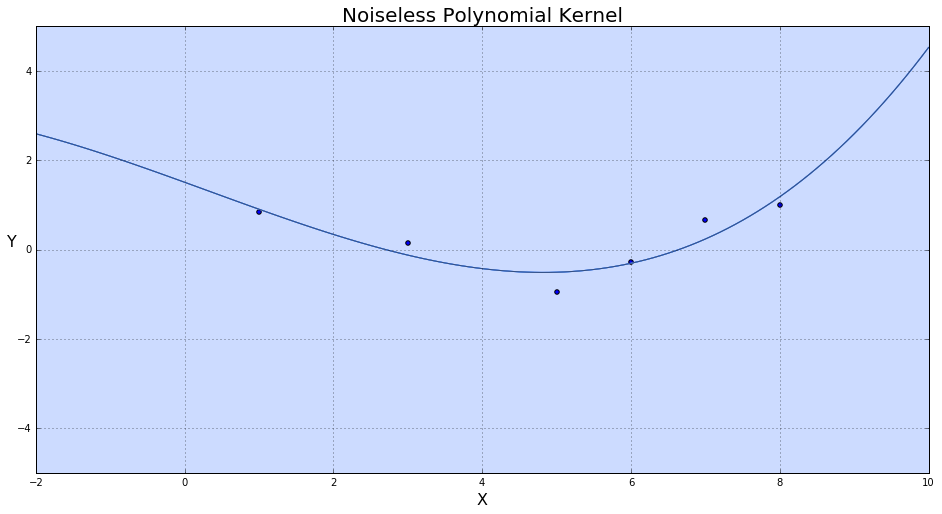

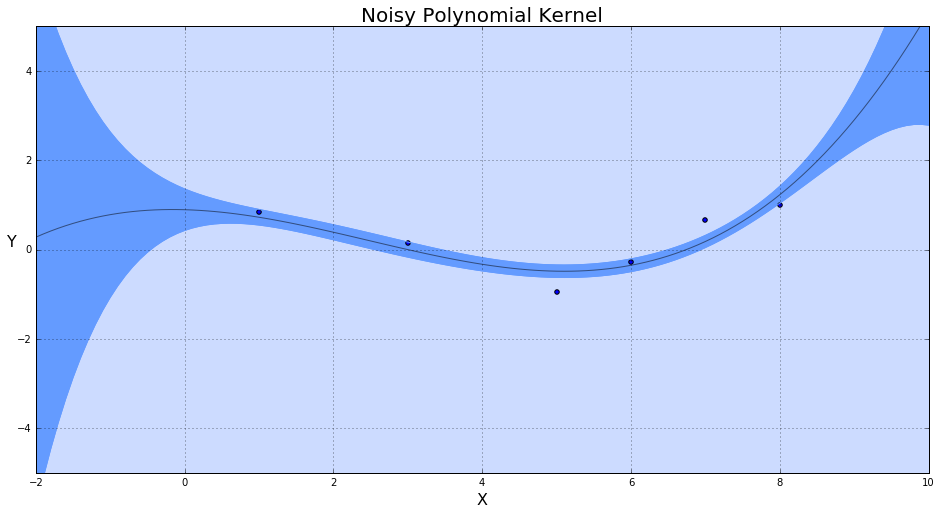

In [9]:
xdata = np.array([1.0, 3.0, 5.0, 6.0, 7.0, 8.0])
ydata = np.sin(xdata)

domain = np.linspace(-2, 10, 121)

kernals = [(linK, "Linear Kernel", (-1.5, 1.5)),
           (rbfK, "Gaussian Kernel", (-1.5, 1.5)),
           (polyK, "Polynomial Kernel", (-5, 5))]

for k, title, ylim in kernals:
    for noise in [0, 0.1]:    
        kxx = createKXX(xdata, k, noise)
        kxxi = np.linalg.pinv(kxx)
        mu = [predict_mu(x, xdata, ydata, kxxi, k) for x in domain]
        sig = [predict_sig(x, xdata, ydata, kxxi, k, noise) for x in domain]
        upper = [p+q for p, q in zip(mu, sig)]
        lower = [p-q for p, q in zip(mu, sig)]
        
        noise_str = "Noiseless " if noise == 0 else "Noisy "
        
        plt.plot(domain, upper, color='#649BFF')
        plt.plot(domain, lower, color='#649BFF')
        plt.xlim((-2, 10))
        plt.ylim(ylim)
        plt.title(noise_str + title, fontsize=20)
        plt.grid(True)
        plt.xlabel('X', fontsize=16)
        plt.ylabel('Y', fontsize=16, rotation='horizontal')
        plt.fill_between(domain, lower, upper, color="#649BFF")
        plt.plot(domain, mu, color='#324D7F')
        plt.scatter(xdata, ydata)
        plt.gca().patch.set_facecolor("#CCDBFF")
        fig = plt.gcf()
        fig.set_size_inches(16, 8)
        plt.show()




### What happens when the bandwidth parameter \sigma_n of the Gaussian kernel gets small? Gets large?
A small \sigma_n makes the variance larger, but overfits on the given data. A large \sigma_n makes the variance smaller and closer to the mean, eventually converging with the mean.

### What happens when the degree M of the polynomial kernel gets small? Gets large?
A small degree M makes the variance small and the mean either quadratic (with M=2) or linear (with M=1). A large degree M makes the variance super large with many oscillations in the variance.
